In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
import seaborn as sns
import datetime as dt
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [201]:
df = pd.read_csv('data/master_data_with_sequel_director.csv')

In [202]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = pd.DatetimeIndex(df['release_date']).year

In [203]:
df['returnb'] = df['domestic_gross'] / df['budget']
df.sort_values('budget',ascending=False).head(50)

,Unnamed: 0,movie_title,domestic_distributor,budget,domestic_opening_sales,earliest_release,rating,runtime_minutes,genres,summary_sales,...,Gal Gadot,Angelina Jolie,Jason Statham,Thomas Tull,Tommy Lee Jones,James Newton Howard,bankable_count,domestic_gross,year,returnb
1,1,Avengers: Endgame,Walt Disney Studios Motion Pictures,356000000,357115007,2019-04-24,PG-13,181.0,"['Action', 'Adventure', 'Drama', 'Sci-Fi']","[['Domestic', 858373000], ['International', 19...",...,0,0,0,0,0,0,3,858373000,2019,2.411160
7,7,Star Wars: Episode VIII,Walt Disney Studios Motion Pictures,317000000,220009584,2017-12-13,PG-13,152.0,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']","[['Domestic', 620181382], ['International', 71...",...,0,0,0,0,0,0,0,620181382,2017,1.956408
71,72,Pirates of the Caribbean: At World's End,Walt Disney Studios Motion Pictures,300000000,114732820,2007-05-22,PG-13,169.0,"['Action', 'Adventure', 'Fantasy']","[['Domestic', 309420425], ['International', 65...",...,0,0,0,0,0,0,1,309420425,2007,1.031401
4,4,Avengers: Infinity War,Walt Disney Studios Motion Pictures,300000000,257698183,2018-04-25,PG-13,149.0,"['Action', 'Adventure', 'Sci-Fi']","[['Domestic', 678815482], ['International', 13...",...,0,0,0,0,0,0,3,678815482,2018,2.262718
130,135,Justice League,Warner Bros.,300000000,93842239,2017-10-17,PG-13,120.0,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']","[['Domestic', 229024295], ['International', 42...",...,1,0,0,0,0,0,2,229024295,2017,0.763414
158,165,Solo: A Star Wars Story,Walt Disney Studios Motion Pictures,275000000,84420489,2018-05-23,PG-13,135.0,"['Action', 'Adventure', 'Sci-Fi']","[['Domestic', 213767512], ['International', 17...",...,0,0,0,0,0,0,0,213767512,2018,0.777336
11,11,Star Wars: Episode IX,Walt Disney Studios Motion Pictures,275000000,177383864,2019-12-18,PG-13,141.0,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']","[['Domestic', 515202542], ['International', 55...",...,0,0,0,0,0,0,0,515202542,2019,1.873464
181,193,Superman Returns,Warner Bros.,270000000,52535096,2006-06-28,PG-13,154.0,"['Action', 'Sci-Fi']","[['Domestic', 200081192], ['International', 19...",...,0,0,0,0,0,0,0,200081192,2006,0.741041
179,188,Tangled,Walt Disney Studios Motion Pictures,260000000,48767052,2010-11-24,PG,100.0,"['Adventure', 'Animation', 'Comedy', 'Family',...","[['Domestic', 200821936], ['International', 39...",...,0,0,0,0,0,0,0,200821936,2010,0.772392
50,51,Spider-Man 3,Sony Pictures Entertainment (SPE),258000000,151116516,2007-05-01,PG-13,139.0,"['Action', 'Adventure', 'Sci-Fi']","[['Domestic', 336530303], ['International', 55...",...,0,0,0,0,0,0,0,336530303,2007,1.304381


In [204]:
df.columns

Index(['Unnamed: 0', 'movie_title', 'domestic_distributor', 'budget',
       'domestic_opening_sales', 'earliest_release', 'rating',
       'runtime_minutes', 'genres', 'summary_sales', 'crew_list', 'cast_list',
       'domestic_sales', 'international_sales', 'worldwide_sales', 'Action',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Fantasy', 'Family', 'History', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'Western', 'genre_top10',
       'genre_top3', 'genre_top2', 'domestic_dist_processed', 'dd_top5',
       'release_date', 'is_sequel', 'month', 'director', 'top50_d', 'top25_d',
       'Tom Cruise', 'Robert Downey Jr.', 'Kathleen Kennedy', 'Zack Snyder',
       'Will Smith', 'Kevin Feige', 'Denzel Washington', 'Clint Eastwood',
       'Alan Silvestri', 'Steven Spielberg', 'Jon Favreau',
       'Leonardo DiCaprio', 'John Lasseter', 'John Williams', 'Bradley Cooper',
       'Michael Keaton', 'Emma Watson', 'Ian Mc

In [205]:
df.sort_values('budget').groupby('Horror').describe()

Unnamed: 0                                                              \
            count        mean         std   min     25%    50%     75%    max   
Horror                                                                          
0           686.0  367.243440  213.328698   0.0  182.25  369.5  553.75  742.0   
1            37.0  508.216216  195.875121  59.0  360.00  549.0  685.00  739.0   

       budget                ...    year         returnb              \
        count          mean  ...     75%     max   count        mean   
Horror                       ...                                       
0       686.0  1.009933e+08  ...  2015.0  2020.0   686.0    2.533172   
1        37.0  3.871392e+07  ...  2017.0  2019.0    37.0  202.439801   

                                                                           
                std       min       25%       50%        75%          max  
Horror                                                                     
0          4.365821  0.415359  1.198442  1.775354   2.702282    93.383953  
1       1181.463239  0.706840  2.228579  5.677805  11.060257  7194.587333  

[2 rows x 664 columns]

In [206]:
df1 = df[['budget','is_sequel','month','top50_d','year','bankable_count','runtime_minutes','domestic_gross']]

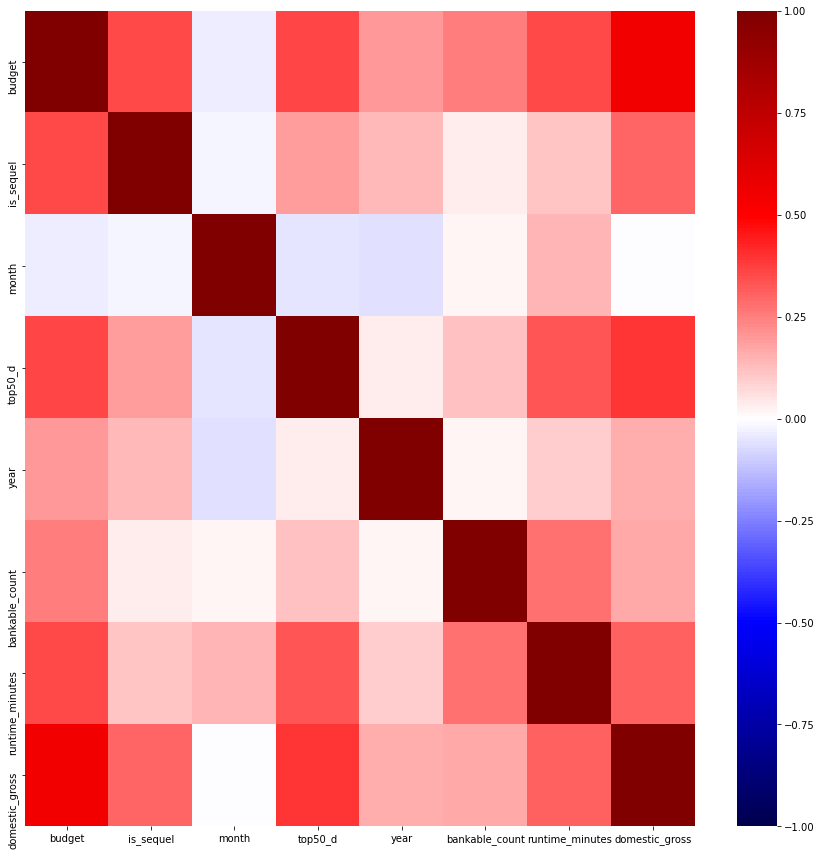

In [207]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df1.corr(), cmap="seismic", vmin=-1, vmax=1, ax=ax);

<ipython-input-208-0640107250d6>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(df1[df1.columns[0:]], ax=ax);


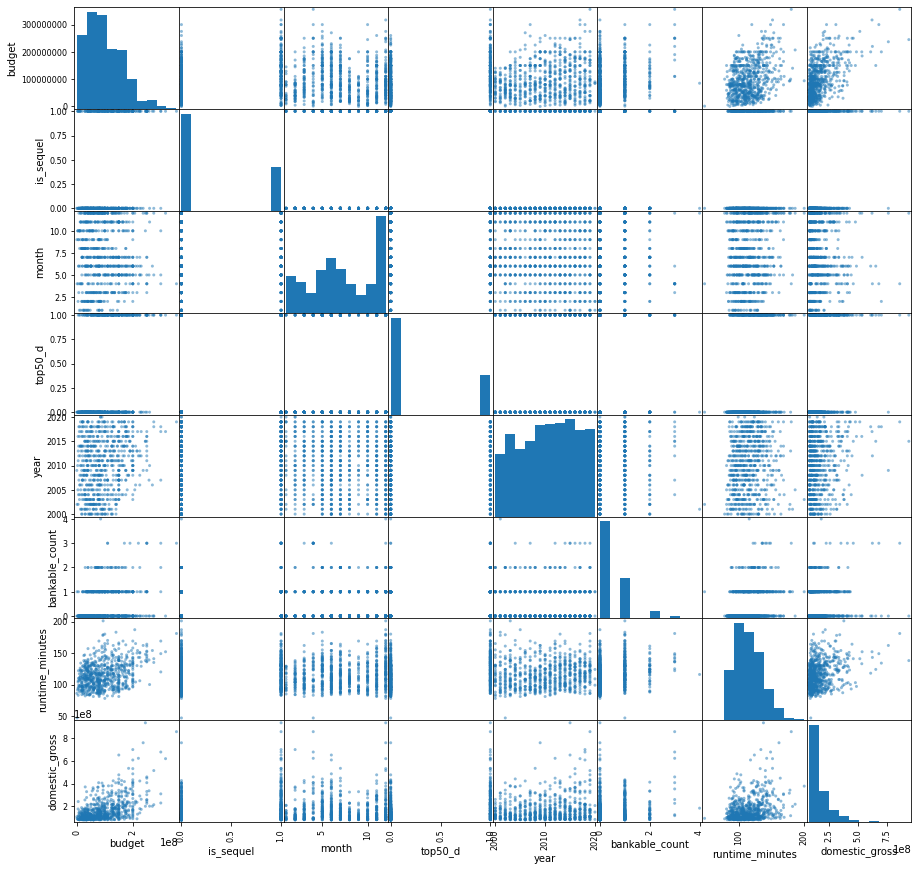

In [208]:
fig, ax = plt.subplots(figsize=(15, 15))
pd.plotting.scatter_matrix(df1[df1.columns[0:]], ax=ax);

Text(0.5, 1.0, 'Budget versus domestic gross top movies from 2000 to 2020')

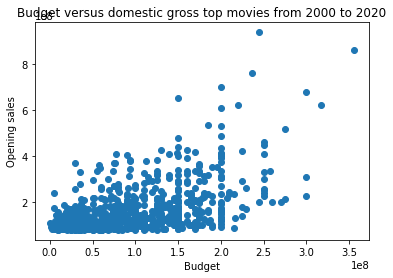

In [209]:
#fig, ax = plt.subplots(figsize=(9, 7))

budget_x = df['budget']
sales_y = df['domestic_gross']

plt.scatter(budget_x, sales_y)
plt.xlabel('Budget')
plt.ylabel('Opening sales')
plt.title('Budget versus domestic gross top movies from 2000 to 2020')

In [210]:
x = df[['budget','is_sequel','rating','top50_d','year','runtime_minutes','month','dd_top5','bankable_count','Action','Adventure','Animation','Comedy','Drama','Horror','Mystery','Romance']]


y = df['domestic_gross']

x_tr, x_test, y_tr, y_test = train_test_split(x, y,test_size=.25, random_state=10)
#5

In [211]:
y_test

396    126643061
544    101028233
431    119194771
687     82622655
536    101802906
         ...    
358    134029801
349    137355633
68     315058289
721     80001807
203    186848418
Name: domestic_gross, Length: 181, dtype: int64

In [212]:
x_train, x_val, y_train, y_val = train_test_split(x_tr, y_tr, test_size=.25, random_state=10)
#10

In [213]:
x_cont_train = x_train[['budget','is_sequel','top50_d','year','month','dd_top5','bankable_count','runtime_minutes','Action','Adventure','Animation','Comedy','Drama','Horror']]
                        
x_cont_val = x_val[['budget','is_sequel','top50_d','year','month','dd_top5','bankable_count','runtime_minutes','Action','Adventure','Animation','Comedy','Drama','Horror']]
x_cont_test = x_test[['budget','is_sequel','top50_d','year','month','dd_top5','bankable_count','runtime_minutes','Action','Adventure','Animation','Comedy','Drama','Horror']]

In [214]:
x_cont_train['BUD2'] = x_cont_train[['budget']]**2
x_cont_val['BUD2'] = x_cont_val[['budget']]**2
x_cont_test['BUD2'] = x_test[['budget']]**2
x_cont_train.head()

<ipython-input-214-24055ca1350e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_cont_train['BUD2'] = x_cont_train[['budget']]**2
<ipython-input-214-24055ca1350e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_cont_val['BUD2'] = x_cont_val[['budget']]**2
<ipython-input-214-24055ca1350e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

,budget,is_sequel,top50_d,year,month,dd_top5,bankable_count,runtime_minutes,Action,Adventure,Animation,Comedy,Drama,Horror,BUD2
620,58000000,0,0,2010,10,0,1,111.0,1,0,0,1,0,0,3364000000000000
619,40000000,0,0,2015,3,1,0,100.0,0,0,0,1,0,0,1600000000000000
335,70000000,0,1,2018,6,1,0,110.0,1,0,0,1,0,0,4900000000000000
317,130000000,0,0,2018,8,1,1,113.0,1,0,0,0,0,1,16900000000000000
451,50000000,1,0,2018,11,0,0,130.0,0,0,0,0,1,0,2500000000000000


In [215]:
x_cat_train = x_train[['rating']]
x_cat_val = x_val[['rating']]
x_cat_test = x_test[['rating']]

In [216]:
ohe = OneHotEncoder(drop='first', sparse=False)

ohe.fit(x_cat_train)

ohe_x_train = ohe.transform(x_cat_train)

columns = ohe.get_feature_names(['rating'])

ohe_x_train_df = pd.DataFrame(ohe_x_train, columns=columns, index=x_cat_train.index)

ohe_x_train_df.head()

,rating_PG,rating_PG-13,rating_R
620,0.0,1.0,0.0
619,0.0,0.0,1.0
335,0.0,1.0,0.0
317,0.0,1.0,0.0
451,0.0,1.0,0.0


In [217]:
ohe_v = OneHotEncoder(drop='first', sparse=False)

ohe_v.fit(x_cat_val)

ohe_x_val = ohe_v.transform(x_cat_val)

columns_v = ohe_v.get_feature_names(['rating'])

ohe_x_val_df = pd.DataFrame(ohe_x_val, columns=columns_v, index=x_cat_val.index)

ohe_x_val_df.head()

,rating_PG,rating_PG-13,rating_R
480,0.0,1.0,0.0
651,0.0,1.0,0.0
248,1.0,0.0,0.0
63,0.0,1.0,0.0
473,0.0,0.0,1.0


In [218]:
ohe_te = OneHotEncoder(drop='first', sparse=False)

ohe_te.fit(x_cat_test)

ohe_x_test = ohe_te.transform(x_cat_test)

columns_te = ohe_te.get_feature_names(['rating'])

ohe_x_test_df = pd.DataFrame(ohe_x_test, columns=columns_te, index=x_cat_test.index)

ohe_x_test_df.head()

,rating_PG,rating_PG-13,rating_R
396,0.0,1.0,0.0
544,0.0,1.0,0.0
431,0.0,0.0,1.0
687,0.0,0.0,1.0
536,0.0,1.0,0.0


In [219]:
combo_train_df = pd.concat([x_cont_train, ohe_x_train_df], axis=1)

combo_val_df =  pd.concat([x_cont_val, ohe_x_val_df], axis=1)

combo_test_df =  pd.concat([x_cont_test, ohe_x_test_df], axis=1)

combo_test_df

,budget,is_sequel,top50_d,year,month,dd_top5,bankable_count,runtime_minutes,Action,Adventure,Animation,Comedy,Drama,Horror,BUD2,rating_PG,rating_PG-13,rating_R
396,180000000,0,1,2016,6,1,0,110.0,1,1,0,0,1,0,32400000000000000,0.0,1.0,0.0
544,120000000,0,0,2018,4,1,1,107.0,1,1,0,0,0,0,14400000000000000,0.0,1.0,0.0
431,6000000,0,0,2004,6,0,1,122.0,0,0,0,0,1,0,36000000000000,0.0,0.0,1.0
687,30000000,1,0,2003,8,0,0,97.0,1,0,0,0,0,1,900000000000000,0.0,0.0,1.0
536,190000000,0,0,2013,7,1,0,131.0,1,1,0,0,0,0,36100000000000000,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,150000000,1,1,2006,5,0,1,126.0,1,1,0,0,0,0,22500000000000000,0.0,1.0,0.0
349,82500000,0,0,2006,6,0,0,107.0,0,0,0,1,1,0,6806250000000000,0.0,1.0,0.0
68,180000000,1,0,2017,10,1,1,130.0,1,1,0,1,0,0,32400000000000000,0.0,1.0,0.0
721,110000000,1,1,2019,6,0,0,114.0,1,1,0,1,0,0,12100000000000000,0.0,1.0,0.0


In [220]:
m = LinearRegression()
p = PolynomialFeatures(degree=2, interaction_only=True)
x_train_poly = p.fit_transform(combo_train_df)
m.fit(x_train_poly,y_train)
m.score(x_train_poly,y_train)

0.47476619455241564

In [221]:
list(zip(p.get_feature_names(['budget','BUD2','is_sequel','top50_d','year','month','dd_top5','bankable_count','runtime_minutes','Action','Adventure','Animation','Comedy','Drama','Horror','R','G','PG','PG-13']),m.coef_))

[('1', 1.7495309939150382e-07),
 ('budget', -3.5165164249591157e-06),
 ('BUD2', 5.029327376694558e-11),
 ('is_sequel', 2.1634789828161183e-13),
 ('top50_d', 1.4279564669027668e-12),
 ('year', 1.6857020945086775e-13),
 ('month', 8.083416319096496e-14),
 ('dd_top5', 4.042509963541738e-14),
 ('bankable_count', -3.0492988464131826e-14),
 ('runtime_minutes', 2.9266462415148912e-15),
 ('Action', 9.767031637585329e-14),
 ('Adventure', -5.3712217594416535e-14),
 ('Animation', 7.201216895824855e-14),
 ('Comedy', -7.416204650841351e-14),
 ('Drama', -3.681193393407111e-13),
 ('Horror', -1.7010415286154878e-07),
 ('R', 3.49961669066153e-12),
 ('G', -4.050973006760545e-17),
 ('PG', -8.328571013955366e-16),
 ('budget BUD2', 1.4264158673208171e-08),
 ('budget is_sequel', -4.838145148351218e-09),
 ('budget top50_d', 0.00024371294977900454),
 ('budget year', 1.0172761402958627e-06),
 ('budget month', 4.3320659043522024e-08),
 ('budget dd_top5', -4.7244117726674764e-08),
 ('budget bankable_count', 9.891

In [222]:
x_val_poly = p.fit_transform(combo_val_df)
m.score(x_val_poly,y_val)

0.17701117299979596

In [223]:
x_test_poly = p.fit_transform(combo_test_df)
m.score(x_test_poly,y_test)

0.4006856161074469

In [224]:
from sklearn.linear_model import LassoCV

In [225]:
lcv = LassoCV()
p = PolynomialFeatures(degree=2,interaction_only=True)
x_train_poly = p.fit_transform(combo_train_df)
s = StandardScaler(with_mean=False)
x_train_poly_scaled = s.fit_transform(x_train_poly)
lcv.fit(x_train_poly_scaled,y_train)
lcv.score(x_train_poly_scaled,y_train)

/Users/tawneykirkland/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 495631183671552.0, tolerance: 446361448024842.2
  model = cd_fast.enet_coordinate_descent_gram(
/Users/tawneykirkland/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 604556533480960.0, tolerance: 446361448024842.2
  model = cd_fast.enet_coordinate_descent_gram(
/Users/tawneykirkland/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 948051111483136.0, tolerance: 446361448024842.2
  model = cd_fast.enet_coordinate_descent_gram(
/Users/tawneykirkland/opt/anaco

/Users/tawneykirkland/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 566531083976192.0, tolerance: 429396733977507.4
  model = cd_fast.enet_coordinate_descent_gram(
/Users/tawneykirkland/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 879477705859072.0, tolerance: 429396733977507.4
  model = cd_fast.enet_coordinate_descent_gram(
/Users/tawneykirkland/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1517232313482752.0, tolerance: 429396733977507.4
  model = cd_fast.enet_coordinate_descent_gram(
/Users/tawneykirkland/opt/anac

/Users/tawneykirkland/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6026074994865664.0, tolerance: 442204418692040.1
  model = cd_fast.enet_coordinate_descent_gram(
/Users/tawneykirkland/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8645804873009408.0, tolerance: 442204418692040.1
  model = cd_fast.enet_coordinate_descent_gram(
/Users/tawneykirkland/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2454294554447616.0, tolerance: 442204418692040.1
  model = cd_fast.enet_coordinate_descent_gram(
/Users/tawneykirkland/opt/an

/Users/tawneykirkland/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9294499170859520.0, tolerance: 414210185112783.5
  model = cd_fast.enet_coordinate_descent_gram(
/Users/tawneykirkland/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2820449058941952e+16, tolerance: 414210185112783.5
  model = cd_fast.enet_coordinate_descent_gram(


0.48085547220549785

In [226]:
lcv.score(s.transform(p.transform(combo_val_df)),y_val)

0.23617893679295543

In [227]:
lcv.score(s.transform(p.transform(combo_test_df)),y_test)

0.4176094136357055

In [228]:
lcv.alpha_

5094531.172025066

In [229]:
list(zip(p.get_feature_names(['budget','BUD2','is_sequel','top50_d','year','month',
                              'dd_top5','bankable_count','runtime_minutes','Action',
                              'Adventure','Animation','Comedy','Drama','Horror','R',
                              'G','PG','PG-13']),lcv.coef_))

[('1', 0.0),
 ('budget', 0.0),
 ('BUD2', 0.0),
 ('is_sequel', 0.0),
 ('top50_d', 0.0),
 ('year', -0.0),
 ('month', -0.0),
 ('dd_top5', 0.0),
 ('bankable_count', 0.0),
 ('runtime_minutes', 0.0),
 ('Action', 0.0),
 ('Adventure', 0.0),
 ('Animation', 0.0),
 ('Comedy', -0.0),
 ('Drama', -0.0),
 ('Horror', 0.0),
 ('R', 0.0),
 ('G', 0.0),
 ('PG', -0.0),
 ('budget BUD2', 0.0),
 ('budget is_sequel', 0.0),
 ('budget top50_d', 0.0),
 ('budget year', 0.0),
 ('budget month', 0.0),
 ('budget dd_top5', 0.0),
 ('budget bankable_count', 0.0),
 ('budget runtime_minutes', 0.0),
 ('budget Action', 0.0),
 ('budget Adventure', 0.0),
 ('budget Animation', 0.0),
 ('budget Comedy', -0.0),
 ('budget Drama', -0.0),
 ('budget Horror', 0.0),
 ('budget R', -0.0),
 ('budget G', 0.0),
 ('budget PG', -0.0),
 ('BUD2 is_sequel', 9654119.250980048),
 ('BUD2 top50_d', 0.0),
 ('BUD2 year', 0.0),
 ('BUD2 month', -0.0),
 ('BUD2 dd_top5', 0.0),
 ('BUD2 bankable_count', 0.0),
 ('BUD2 runtime_minutes', 0.0),
 ('BUD2 Action', 0

In [344]:
combo_lr = LinearRegression()

combo_lr.fit(combo_train_df, y_train)

combo_lr.score(combo_val_df, y_val) #R2

y_pred = combo_lr.predict(combo_val_df)
np.sqrt(mean_squared_error(y_val, y_pred))

89839440.44175078

In [345]:
combo_lr.score(combo_val_df, y_val) #R2

0.45271593524438614

In [346]:
print('Feature coefficient results: \n')
for feature, coef in zip(combo_train_df.columns, combo_lr.coef_):
        print(feature, ':', f'{coef:.2f}')

Feature coefficient results: 

budget : 0.24
is_sequel : 1892.05
top50_d : 1776.14
year : 405699.03
month : 1944.58
bankable_count : 2557.30
runtime_minutes : 551833.26
Action : 2863.84
Adventure : 425.82
Animation : -3269.16
Comedy : -7480.48
Drama : 6181.05
Horror : -97.19
Mystery : -450.30
Romance : -2625.02
BUD2 : 0.00
rating_PG : -4310.69
rating_PG-13 : -167.32
rating_R : 6754.22


In [347]:
combo_train_df['budget_seq'] = combo_train_df['budget'] * combo_train_df['is_sequel']
combo_val_df['budget_seq'] = combo_val_df['budget'] * combo_val_df['is_sequel']
combo_test_df['budget_seq'] = combo_test_df['budget'] * combo_test_df['is_sequel']


In [348]:
combo_lr2 = LinearRegression()

combo_lr2.fit(combo_train_df, y_train)

combo_lr2.score(combo_val_df, y_val) #R2

y_pred = combo_lr2.predict(combo_val_df)
np.sqrt(mean_squared_error(y_val, y_pred))

88914792.02287726

In [349]:
combo_lr2.score(combo_val_df, y_val) #R2

0.46392351121487063

In [350]:
print('Feature coefficient results: \n')
for feature, coef in zip(combo_train_df.columns, combo_lr2.coef_):
        print(feature, ':', f'{coef:.2f}')

Feature coefficient results: 

budget : 0.26
is_sequel : -477.51
top50_d : 1943.79
year : 264206.55
month : 9748.13
bankable_count : 2858.69
runtime_minutes : 557413.69
Action : 2104.17
Adventure : -676.35
Animation : -3973.25
Comedy : -7470.63
Drama : 6255.36
Horror : -275.20
Mystery : -206.46
Romance : -1119.05
BUD2 : 0.00
rating_PG : -4754.57
rating_PG-13 : 1175.03
rating_R : 5356.55
budget_seq : 0.20


In [351]:
combo_train_df['budget_dir'] = combo_train_df['budget'] * combo_train_df['top50_d']
combo_val_df['budget_dir'] = combo_val_df['budget'] * combo_val_df['top50_d']
combo_test_df['budget_dir'] = combo_test_df['budget'] * combo_test_df['top50_d']

In [352]:
combo_lr4 = LinearRegression()

combo_lr4.fit(combo_train_df, y_train)

combo_lr4.score(combo_val_df, y_val) #R2

y_pred = combo_lr4.predict(combo_val_df)
np.sqrt(mean_squared_error(y_val, y_pred))

86836502.3183538

In [353]:
combo_lr4.score(combo_val_df, y_val) #R2

0.48869107811388957

In [354]:
print('Feature coefficient results: \n')
for feature, coef in zip(combo_train_df.columns, combo_lr4.coef_):
        print(feature, ':', f'{coef:.2f}')

Feature coefficient results: 

budget : 0.27
is_sequel : 620.43
top50_d : 549.52
year : 444954.08
month : -9441.35
bankable_count : 1226.59
runtime_minutes : 292026.36
Action : 2123.68
Adventure : 2041.49
Animation : -365.66
Comedy : -4187.22
Drama : 3782.32
Horror : 163.81
Mystery : -661.10
Romance : -3706.97
BUD2 : 0.00
rating_PG : -1097.83
rating_PG-13 : -2516.61
rating_R : 5671.83
budget_seq : 0.18
budget_dir : 0.43


In [355]:
combo_train_df['dir_act'] = combo_train_df['top50_d'] * combo_train_df['bankable_count']
combo_val_df['dir_act'] = combo_val_df['top50_d'] * combo_val_df['bankable_count']
combo_test_df['dir_act'] = combo_test_df['top50_d'] * combo_test_df['bankable_count']

In [356]:
combo_lr5 = LinearRegression()

combo_lr5.fit(combo_train_df, y_train)

combo_lr5.score(combo_val_df, y_val) #R2

y_pred = combo_lr5.predict(combo_val_df)
np.sqrt(mean_squared_error(y_val, y_pred))

86836432.28969334

In [357]:
combo_lr5.score(combo_val_df, y_val) #R2

0.48869190279621744

In [358]:
print('Feature coefficient results: \n')
for feature, coef in zip(combo_train_df.columns, combo_lr5.coef_):
        print(feature, ':', f'{coef:.2f}')

Feature coefficient results: 

budget : 0.27
is_sequel : 620.17
top50_d : 549.50
year : 444871.99
month : -9438.02
bankable_count : 1229.22
runtime_minutes : 292023.90
Action : 2123.39
Adventure : 2040.70
Animation : -366.25
Comedy : -4187.19
Drama : 3782.13
Horror : 163.71
Mystery : -660.81
Romance : -3706.15
BUD2 : 0.00
rating_PG : -1098.40
rating_PG-13 : -2515.64
rating_R : 5671.13
budget_seq : 0.18
budget_dir : 0.43
dir_act : 715.71


In [366]:
combo_train_df['budget_min'] = combo_train_df['budget'] * combo_train_df['runtime_minutes']
combo_val_df['budget_min'] = combo_val_df['budget'] * combo_val_df['runtime_minutes']
combo_test_df['budget_min'] = combo_test_df['budget'] * combo_test_df['runtime_minutes']

In [367]:
combo_lr6 = LinearRegression()

combo_lr6.fit(combo_train_df, y_train)

combo_lr6.score(combo_val_df, y_val) #R2

y_pred = combo_lr6.predict(combo_val_df)
np.sqrt(mean_squared_error(y_val, y_pred))

86895965.65212822

In [368]:
combo_lr6.score(combo_val_df, y_val) #R2

0.48799057677530644